### CAMBLateDE - Examples  
Diogo H. F. Souza, June 6 2024

Quick reference to access the various parametrizations for the dark energy equation of state implemented in this CAMB:  

<table >
<tr><th ><code>DEmodel</code>= <th> Description <th> CAMB Params <tr><tr>


<tr><td> 1 <td>w(z) constant<td> <code>w0<code> <tr>
<tr><td> 2 <td>w0wa<td> <code>w0</code>,<code>w1<code> <tr>
<tr><td> 3 <td>Constant bin w with 2 bins<td> <code>w0</code>,<code>w1</code>, <code>z1</code>,<code>z2<code><tr>
<tr><td> 4 <td>Constant bin w with 3 bins<td> <code>w0</code>,<code>w1</code>,<code>w2</code>, <code>z1</code>,<code>z2</code>,<code>z3</code><tr>
<tr><td> 5 <td>Constant bin w with 5 bins<td> <code>w0</code>,...,<code>w4</code>, <code>z1</code>,...,<code>z5</code><tr>
<tr><td> 6 <td>Constant bin w with 10 bins<td> <code>w0</code>,...,<code>w9</code>, <code>z1</code>,...,<code>z10</code><tr>
<tr><td> 7 <td>Linear bin w with 2 bins<td> <code>w0</code>,<code>w1</code>, <code>z1</code>,<code>z2<code><tr>
<tr><td> 8 <td>Linear bin w with 3 bins<td> <code>w0</code>,<code>w1</code>,<code>w2</code>, <code>z1</code>,<code>z2</code>,<code>z3</code><tr>
<tr><td> 9 <td>Linear bin w with 5 bins<td> <code>w0</code>,...,<code>w4</code>, <code>z1</code>,...,<code>z5</code><tr>
<tr><td> 10 <td>Linear bin w with 5 bins<td> <code>w0</code>,...,<code>w9</code>, <code>z1</code>,...,<code>z10</code><tr>
<tr><td> 11 <td>Quadratic bin w with 2 bins<td> <code>w0</code>,<code>w1</code>, <code>z1</code>,<code>z2<code><tr>
<tr><td> 12 <td>Quadratic bin w with 3 bins<td> <code>w0</code>,<code>w1</code>,<code>w2</code>, <code>z1</code>,<code>z2</code>,<code>z3</code><tr>
<tr><td> 13 <td>Quadratic bin w with 5 bins<td> <code>w0</code>,...,<code>w4</code>, <code>z1</code>,...,<code>z5</code><tr>
<tr><td> 14 <td>Cubic bin w with 2 bins<td> <code>w0</code>,<code>w1</code>, <code>z1</code>,<code>z2<code><tr>
<tr><td> 15 <td>Cubic bin w with 3 bins<td> <code>w0</code>,<code>w1</code>,<code>w2</code>, <code>z1</code>,<code>z2</code>,<code>z3</code><tr>
<tr><td> 16 <td>Cubic bin w with 5 bins<td> <code>w0</code>,...,<code>w4</code>, <code>z1</code>,...,<code>z5</code><tr>
<tr><td> 17 <td>Hyperbolic tangent, Eq 21 in arxiv 1502.01590<td> <code>w0</code>,<code>w1</code>, <code>z1</code>, <code>sigma</code><tr>
<tr><td> 18 <td>Constant bin w with arbitrary # of bins<td> <code>max_num_of_bins</code>,<code>w_knot</code>=[w1,...,wn], <code>z_knot</code>=[z1,..., zn]*<tr>

<table>  

\* Note that the maximum lenght of the Python lists `w_knot` and `z_knot` is equal to integer `max_num_of_bins`   
\** `DEmodel` is an `integer`. All CAMB parameters from `DEmodel`=1 to 17 are `float`.

### Section 1 - Bin $w(z)$

In [1]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


In [2]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 6,
                            w0 = -0.8, w1 = -0.4, w2 = -0.2, w3 = -0.7, w4 = -0.9,
                            w5 = -0.6, w6 = -0.7, w7 = -0.5, w8 = -0.4, w9 = -0.9,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [3]:
scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

latede_results = camb.get_results(latede_cosmology)
rho_test, w_test = latede_results.get_dark_energy_rho_w(scale_factor)

latede_results = camb.get_results(latede_cosmology)
rho_de = latede_results.get_background_densities(scale_factor)['de']

In [4]:
rho_test, w_test = latede_results.get_dark_energy_rho_w(scale_factor)

(0.0, 7.0)

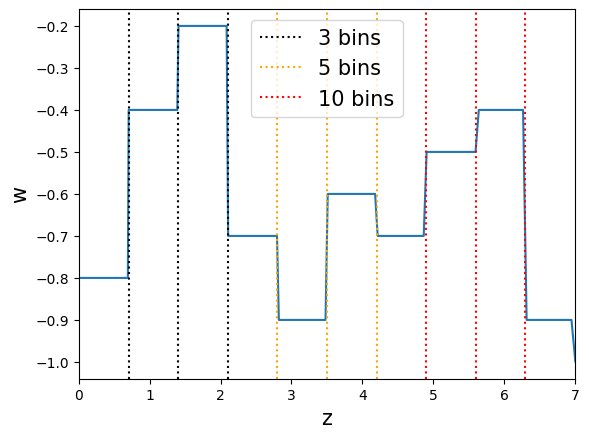

In [5]:
plt.plot(redshift,w_test)
# Model with 3 bins
plt.axvline(x = 0.7,ls=':',c='k',label='3 bins')
plt.axvline(x = 1.4,ls=':',c='k')
plt.axvline(x = 2.1,ls=':',c='k')
# Model with 5 bins
plt.axvline(x = 2.8,ls=':',c='orange',label='5 bins')
plt.axvline(x = 3.5,ls=':',c='orange')
plt.axvline(x = 4.2,ls=':',c='orange')
# Model with 10 bins
plt.axvline(x = 4.9,ls=':',c='red',label='10 bins')
plt.axvline(x = 5.6,ls=':',c='red')
plt.axvline(x = 6.3,ls=':',c='red')
#
plt.xlabel('z',fontsize=15)
plt.ylabel('w',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.xlim(0,7)
# plt.savefig("constant_binned_w.pdf");

### Section 2 - Linear $w(z)$: 2 bins

In [6]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


In [7]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 7,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [8]:
scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

latede_results = camb.get_results(latede_cosmology)
rho_test, linear_wde_2bins = latede_results.get_dark_energy_rho_w(scale_factor)
linear_rhode_2bins = latede_results.get_background_densities(scale_factor)['de']

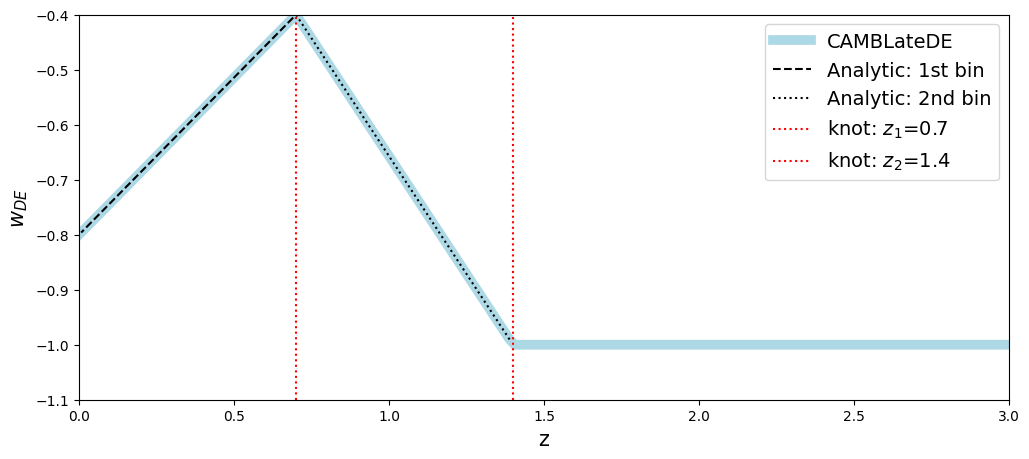

In [9]:
# # Model with 2 bins
z0 = 0
z1 = latede_results.Params.DarkEnergy.z1
z2 = latede_results.Params.DarkEnergy.z2
z3 = latede_results.Params.DarkEnergy.z3
#
w0 = latede_results.Params.DarkEnergy.w0
w1 = latede_results.Params.DarkEnergy.w1
w2 = latede_results.Params.DarkEnergy.w2
w3 = latede_results.Params.DarkEnergy.w3
#
wa0 = (w1-w0)/(z1-z0)
wa1 = (w2-w1)/(z2-z1)
wa2 = (w3-w2)/(z3-z1)
#

w_1st_bin,w_2nd_bin,w_3rd_bin=[],[],[]
redshift1,redshift2,redshift3=[],[],[]

for i in np.arange(len(redshift)):
    if (z0<redshift[i]<z1):
        redshift1.append(redshift[i])
        w_1st_bin.append(w0 + wa0*(redshift[i]-z0))
    elif (z1<redshift[i]<z2):
        redshift2.append(redshift[i])    
        w_2nd_bin.append(w1 + wa1*(redshift[i]-z1))
    elif (z2<redshift[i]):
        redshift3.append(redshift[i])    
        w_3rd_bin.append(w2)    

plt.rcParams['figure.figsize'] = [12, 5]      
        
plt.plot(redshift,linear_wde_2bins,color='lightblue',lw=7,label='CAMBLateDE')
plt.plot(redshift1,w_1st_bin,ls='--',color='black',label=r'Analytic: 1st bin')
plt.plot(redshift2,w_2nd_bin,ls=':',color='black',label=r'Analytic: 2nd bin')
# plt.plot(redshift3,w_3rd_bin,ls='-.',color='black',label=r'Analytic: $w(z)$: 3rd bin')

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))

plt.xlabel('z',fontsize=15)
plt.ylabel(r'$w_{DE}$',fontsize=15)
plt.legend(loc='best',fontsize=14)
plt.xlim(0,3)
plt.ylim(-1.1,-.4);
# plt.savefig("linear_binned_w_2bins.pdf");

In [10]:
scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1
k = 0.3

latede_results = camb.get_results(latede_cosmology)

linear_rhode_2bins = latede_results.get_background_densities(scale_factor)['de']
latede_hubble = latede_results.hubble_parameter(redshift)
latede_cls = latede_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]
ells = [i for i in range(len(latede_cls))]

latede_ks = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
latede_pk = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2][0]

latede_delta_de = latede_results.get_redshift_evolution(k, redshift, 'delta_tot_de')
latede_delta_photon = latede_results.get_redshift_evolution(k, redshift, 'delta_photon')
latede_delta_cdm = latede_results.get_redshift_evolution(k, redshift, 'delta_cdm')

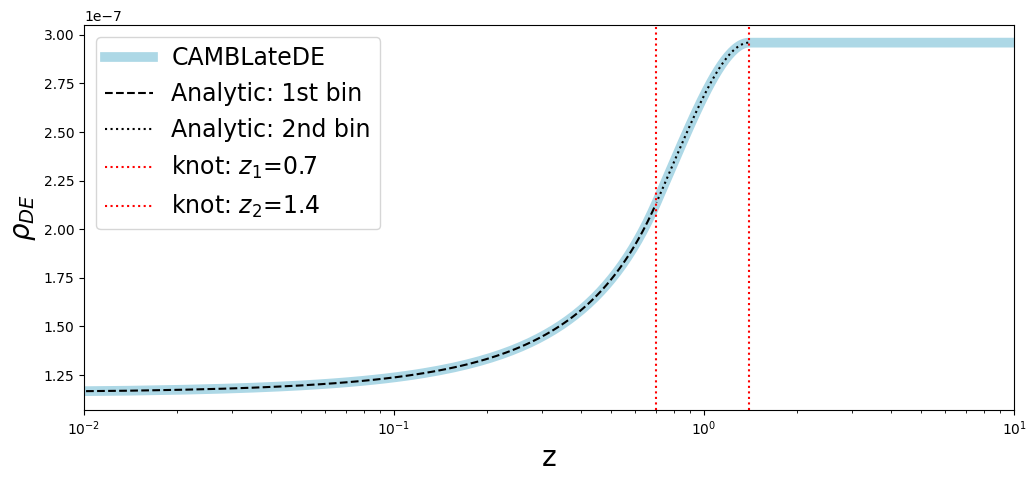

In [11]:
# DE energy density
z = redshift

rho_de_1st_bin, rho_de_2nd_bin, rho_de_3rd_bin = [], [], []
redshift1, redshift2, redshift3 = [], [], []
scale_factor1, scale_factor2, scale_factor3 = [], [], []

wa0 = (w1-w0)/(z1-z0)
wa1 = (w2-w1)/(z2-z1)
wa2 = (w3-w2)/(z3-z2)

alpha0 = 3*(1+w0-wa0*(1+z0))      
alpha1 = 3*(1+w1-wa1*(1+z1))
alpha2 = 3*(1+w2-wa2*(1+z2))

grho_de_today = 1.1598304491343165E-007 # from CAMB with write(*,*)

for i in np.arange(len(z)):
    if (z0 < z[i] < z1):
        redshift1.append(z[i])
        scale_factor1.append(1/(1+z[i]))
        grho_de1 = grho_de_today * \
                                 ((1+z[i])/(1+z0))**alpha0*np.exp(3*wa0*(z[i]-z0))
        rho_de_1st_bin.append(grho_de1)
    elif (z1 < z[i] < z2):
        redshift2.append(z[i]) 
        scale_factor2.append(1/(1+z[i]))
        grho_de2 = grho_de_today * \
                                 ((1+z1  )/(1+z0))**alpha0*np.exp(3*wa0*(z1  -z0)) * \
                                 ((1+z[i])/(1+z1))**alpha1*np.exp(3*wa1*(z[i]-z1))
        rho_de_2nd_bin.append(grho_de2)
    elif (z2 < z[i]):
        redshift3.append(redshift[i])  
        scale_factor3.append(1/(1+z[i]))
        grho_de3 = grho_de_today * \
                                 ((1+z1  )/(1+z0))**alpha0*np.exp(3*wa0*(z1  -z0)) * \
                                 ((1+z2  )/(1+z1))**alpha1*np.exp(3*wa1*(z2  -z1)) * \
                                 ((1+z[i])/(1+z2))**alpha2*np.exp(3*wa2*(z[i]-z2))
        rho_de_3rd_bin.append(grho_de3)

plt.rcParams['figure.figsize'] = [12, 5]

plt.semilogx(redshift,linear_rhode_2bins*(redshift+1)**4,'lightblue',label='CAMBLateDE',lw=7)
plt.semilogx(redshift1,rho_de_1st_bin,ls='--',color='black',label=r'Analytic: 1st bin')
plt.semilogx(redshift2,rho_de_2nd_bin,ls=':',color='black',label=r'Analytic: 2nd bin')
# plt.semilogx(redshift3,rho_de_3rd_bin,ls='-.',color='black',label=r'Analytic $\rho_{DE}$: 3rd bin')

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))

plt.legend(loc='best',fontsize=17)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$\rho_{DE}$',fontsize=20)
plt.xlim(0.01,10);
# plt.savefig("linear_binned_rhode.pdf");

### Section 3 - Linear $w(z)$: 3 bins

In [12]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


In [13]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 8,
                            w0 = -0.8, w1 = -0.4, w2 = -0.2, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [14]:
scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

latede_results = camb.get_results(latede_cosmology)
rho_test, linear_wde_3bins = latede_results.get_dark_energy_rho_w(scale_factor)
linear_rhode_3bins = latede_results.get_background_densities(scale_factor)['de']

(0.0, 3.0)

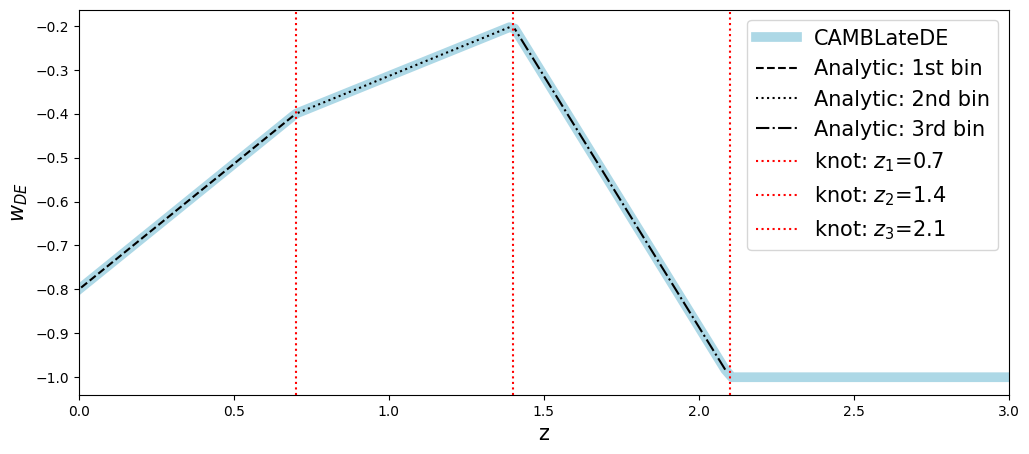

In [15]:
# # Model with 2 bins
z0 = 0
z1 = latede_results.Params.DarkEnergy.z1
z2 = latede_results.Params.DarkEnergy.z2
z3 = latede_results.Params.DarkEnergy.z3
z4 = latede_results.Params.DarkEnergy.z4
#
w0 = latede_results.Params.DarkEnergy.w0
w1 = latede_results.Params.DarkEnergy.w1
w2 = latede_results.Params.DarkEnergy.w2
w3 = latede_results.Params.DarkEnergy.w3
w4 = latede_results.Params.DarkEnergy.w4
#
wa0 = (w1-w0)/(z1-z0)
wa1 = (w2-w1)/(z2-z1)
wa2 = (w3-w2)/(z3-z2)
#

w_1st_bin,w_2nd_bin,w_3rd_bin,w_4th_bin=[],[],[],[]
redshift1,redshift2,redshift3,redshift4=[],[],[],[]

for i in np.arange(len(redshift)):
    if (z0<redshift[i]<z1):
        redshift1.append(redshift[i])
        w_1st_bin.append(w0 + wa0*(redshift[i]-z0))
    elif (z1<redshift[i]<z2):
        redshift2.append(redshift[i])    
        w_2nd_bin.append(w1 + wa1*(redshift[i]-z1))
    elif (z2<redshift[i]<z3):
        redshift3.append(redshift[i])    
        w_3rd_bin.append(w2 + wa2*(redshift[i]-z2))
    elif (z3<redshift[i]):
        redshift4.append(redshift[i])    
        w_4th_bin.append(w3)        

plt.rcParams['figure.figsize'] = [12, 5]      
        
plt.plot(redshift,linear_wde_3bins,color='lightblue',lw=7,label='CAMBLateDE')
plt.plot(redshift1,w_1st_bin,ls='--',color='black',label=r'Analytic: 1st bin')
plt.plot(redshift2,w_2nd_bin,ls=':',color='black',label=r'Analytic: 2nd bin')
plt.plot(redshift3,w_3rd_bin,ls='-.',color='black',label=r'Analytic: 3rd bin')
# plt.plot(redshift4,w_4th_bin,ls=':',color='black')

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_3$={}'.format(z3))

plt.xlabel('z',fontsize=15)
plt.ylabel(r'$w_{DE}$',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.xlim(0,3)
# plt.ylim(-1.1,-.3);
# plt.savefig("linear_binned_w_3bins.pdf");

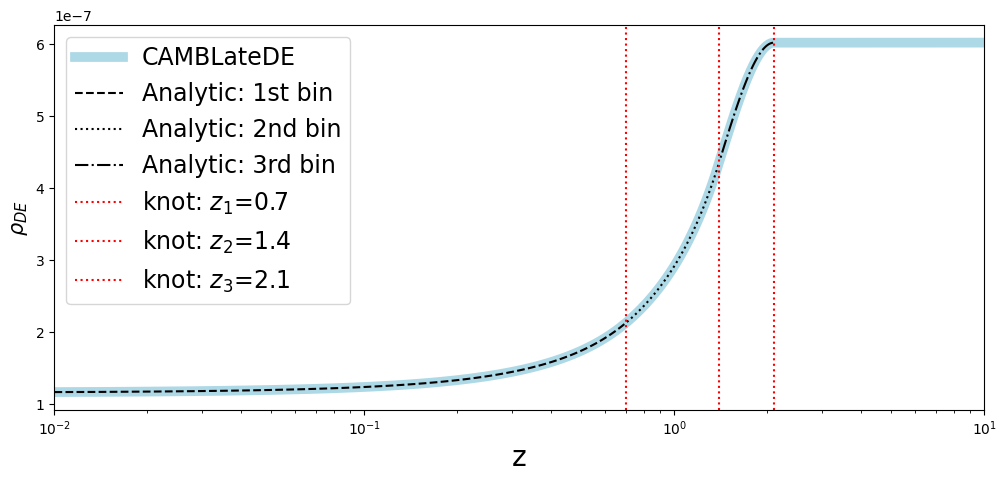

In [16]:
# DE energy density
z = redshift

rho_de_1st_bin, rho_de_2nd_bin, rho_de_3rd_bin, rho_de_4th_bin = [], [], [], []
redshift1, redshift2, redshift3, redshift4 = [], [], [], []

wa0 = (w1-w0)/(z1-z0)
wa1 = (w2-w1)/(z2-z1)
wa2 = (w3-w2)/(z3-z2)
wa3 = (w4-w3)/(z4-z3)

alpha0 = 3*(1+w0-wa0*(1+z0))      
alpha1 = 3*(1+w1-wa1*(1+z1))
alpha2 = 3*(1+w2-wa2*(1+z2))
alpha3 = 3*(1+w3-wa3*(1+z3))

grho_de_today = 1.1598304491343165E-007 # from CAMB with write(*,*)

for i in np.arange(len(z)):
    if (z0 < z[i] < z1):
        redshift1.append(z[i])
        grho_de1 = grho_de_today * \
                                 ((1+z[i])/(1+z0))**alpha0*np.exp(3*wa0*(z[i]-z0))
        rho_de_1st_bin.append(grho_de1)
    elif (z1 < z[i] < z2):
        redshift2.append(z[i]) 
        grho_de2 = grho_de_today * \
                                 ((1+z1  )/(1+z0))**alpha0*np.exp(3*wa0*(z1  -z0)) * \
                                 ((1+z[i])/(1+z1))**alpha1*np.exp(3*wa1*(z[i]-z1))
        rho_de_2nd_bin.append(grho_de2)
    elif (z2 < z[i] < z3):
        redshift3.append(redshift[i])  
        grho_de3 = grho_de_today * \
                                 ((1+z1  )/(1+z0))**alpha0*np.exp(3*wa0*(z1  -z0)) * \
                                 ((1+z2  )/(1+z1))**alpha1*np.exp(3*wa1*(z2  -z1)) * \
                                 ((1+z[i])/(1+z2))**alpha2*np.exp(3*wa2*(z[i]-z2))
        rho_de_3rd_bin.append(grho_de3)
    elif (z3 < z[i]):
        redshift4.append(redshift[i])  
        grho_de4 = grho_de_today * \
                                 ((1+z1  )/(1+z0))**alpha0*np.exp(3*wa0*(z1  -z0)) * \
                                 ((1+z2  )/(1+z1))**alpha1*np.exp(3*wa1*(z2  -z1)) * \
                                 ((1+z3  )/(1+z2))**alpha2*np.exp(3*wa2*(z3  -z2)) * \
                                 ((1+z[i])/(1+z3))**alpha3*np.exp(3*wa3*(z[i]-z3))
        rho_de_4th_bin.append(grho_de4)        

plt.rcParams['figure.figsize'] = [12, 5]

plt.semilogx(redshift,linear_rhode_3bins*(redshift+1)**4,'lightblue',label='CAMBLateDE',lw=7)
plt.semilogx(redshift1,rho_de_1st_bin,ls='--',color='black',label=r'Analytic: 1st bin')
plt.semilogx(redshift2,rho_de_2nd_bin,ls=':',color='black',label=r'Analytic: 2nd bin')
plt.semilogx(redshift3,rho_de_3rd_bin,ls='-.',color='black',label=r'Analytic: 3rd bin')
# plt.semilogx(redshift4,rho_de_4th_bin,ls=':',color='black') #,label=r'Analytic: 4th bin'

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_3$={}'.format(z3))

plt.legend(loc='best',fontsize=17)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$\rho_{DE}$',fontsize=15)
plt.xlim(0.01,10);
# plt.savefig("linear_binned_rhode.pdf");

### Section 4 - Quadratic $w(z)$: 2 bins

In [17]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


In [18]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 11,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [19]:
scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

latede_results = camb.get_results(latede_cosmology)
rho_test, quadratic_wde_2bins = latede_results.get_dark_energy_rho_w(scale_factor)
quadratic_rhode_2bins = latede_results.get_background_densities(scale_factor)['de']

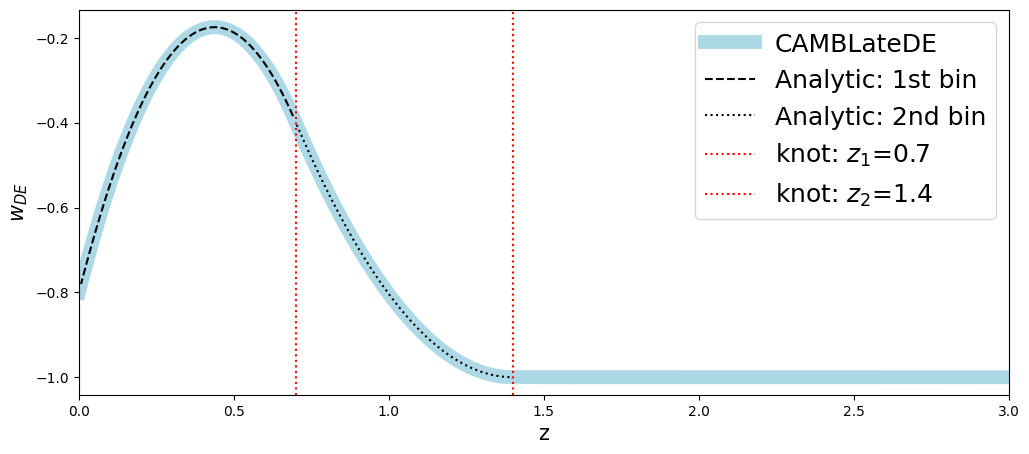

In [20]:
# # Model with 2 bins
z0 = 0
z1 = latede_results.Params.DarkEnergy.z1
z2 = latede_results.Params.DarkEnergy.z2
z3 = latede_results.Params.DarkEnergy.z3
#
w0 = latede_results.Params.DarkEnergy.w0
w1 = latede_results.Params.DarkEnergy.w1
w2 = latede_results.Params.DarkEnergy.w2
w3 = latede_results.Params.DarkEnergy.w3

Delta_z1 = z1-z0
Delta_w1 = w1-w0
Delta_z2 = z2-z1
Delta_w2 = w2-w1

# Boundary conditions -see my notes-
wa0  = 2.*(Delta_w1/Delta_z1 - Delta_w2/Delta_z2)
waa0 = -Delta_w1/Delta_z1**2 + 2.*Delta_w2/(Delta_z1*Delta_z2)
wa1  =  2.*Delta_w2/Delta_z2
waa1 =  -Delta_w2/Delta_z2**2
wa2  = 0
waa2 = 0

w_1st_bin,w_2nd_bin,w_3rd_bin=[],[],[]
redshift1,redshift2,redshift3=[],[],[]

for i in np.arange(len(redshift)):
    if (z0<redshift[i]<z1):
        redshift1.append(redshift[i])
        w_1st_bin.append(w0 + wa0*(redshift[i]-z0) + waa0*(redshift[i]-z0)**2)
    elif (z1<redshift[i]<z2):
        redshift2.append(redshift[i])    
        w_2nd_bin.append(w1 + wa1*(redshift[i]-z1) + waa1*(redshift[i]-z1)**2)
    elif (z2<redshift[i]):
        redshift3.append(redshift[i])    
        w_3rd_bin.append(w2 + wa2*(redshift[i]-z2) + waa2*(redshift[i]-z2)**2)    

plt.rcParams['figure.figsize'] = [12, 5] 

plt.plot(redshift,quadratic_wde_2bins,color='lightblue',lw=10,label='CAMBLateDE')
plt.plot(redshift1,w_1st_bin,ls='--',color='black',label=r'Analytic: 1st bin')
plt.plot(redshift2,w_2nd_bin,ls=':',color='black',label=r'Analytic: 2nd bin')
# plt.plot(redshift3,w_3rd_bin,ls='-.',color='black',label=r'Analytic: $w(z)$: 3rd bin')

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))

plt.xlabel('z',fontsize=15)
plt.ylabel(r'$w_{DE}$',fontsize=15)
plt.legend(loc='best',fontsize=18)
plt.xlim(0,3);
# plt.savefig("quadratic_binned_w.pdf");

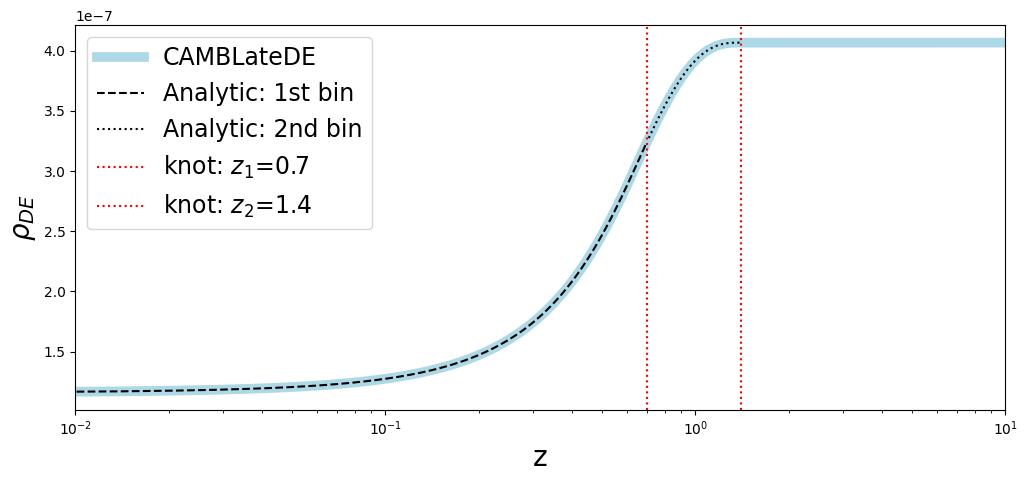

In [21]:
# DE energy density
z = redshift

rho_de_1st_bin, rho_de_2nd_bin, rho_de_3rd_bin = [], [], []
redshift1, redshift2, redshift3 = [], [], []

wa0  = 2*(Delta_w1/Delta_z1 - Delta_w2/Delta_z2)
waa0 = -Delta_w1/Delta_z1**2 + 2*Delta_w2/(Delta_z1*Delta_z2)
wa1  = 2*Delta_w2/Delta_z2
waa1 = -Delta_w2/Delta_z2**2 
wa2  = 0
waa2 = 0

A00 = 3*(1 + w0 - wa0*z0 + waa0*z0**2)
A10 = 3*(wa0 - 2*waa0*z0)
A20 = 3*waa0

A01 = 3*(1 + w1 - wa1*z1 + waa1*z1**2)
A11 = 3*(wa1 - 2*waa1*z1)
A21 = 3*waa1

A02 = 3*(1 + w2 - wa2*z2 + waa2*z2**2)
A12 = 3*(wa2 - 2*waa2*z2)
A22 = 3*waa2

grho_de_today = 1.1598304491343165E-007 # from CAMB with write(*,*)

for i in np.arange(len(z)):
    if (z0 < z[i] < z1):
        redshift1.append(z[i])
        grho_de1 = grho_de_today * \
                   (((1+z[i])/(1+z0))**(A00-A10+A20))*np.exp((A10-A20)*(z[i]-z0)+A20*(z[i]**2-z0**2)/2)
        rho_de_1st_bin.append(grho_de1)
    elif (z1 < z[i] < z2):
        redshift2.append(z[i]) 
        grho_de2 = grho_de_today * \
                   (((1+z1)  /(1+z0))**(A00-A10+A20))*np.exp((A10-A20)*(z1  -z0)+A20*(z1**2   -z0**2)/2) * \
                   (((1+z[i])/(1+z1))**(A01-A11+A21))*np.exp((A11-A21)*(z[i]-z1)+A21*(z[i]**2 -z1**2)/2)
        rho_de_2nd_bin.append(grho_de2)
    elif (z2 < z[i]):
        redshift3.append(redshift[i])  
        grho_de3 = grho_de_today * \
                   (((1+z1)  /(1+z0))**(A00-A10+A20))*np.exp((A10-A20)*(z1  -z0)+A20*(z1**2  -z0**2)/2) * \
                   (((1+z2)  /(1+z1))**(A01-A11+A21))*np.exp((A11-A21)*(z2  -z1)+A21*(z2**2  -z1**2)/2) * \
                   (((1+z[i])/(1+z2))**(A02-A12+A22))*np.exp((A12-A22)*(z[i]-z2)+A22*(z[i]**2 -z2**2)/2)
        rho_de_3rd_bin.append(grho_de3)

plt.rcParams['figure.figsize'] = [12, 5]

plt.semilogx(redshift,quadratic_rhode_2bins*(redshift+1)**4,'lightblue',label='CAMBLateDE',lw=7)
plt.semilogx(redshift1,rho_de_1st_bin,ls='--',color='black',label=r'Analytic: 1st bin')
plt.semilogx(redshift2,rho_de_2nd_bin,ls=':',color='black',label=r'Analytic: 2nd bin')
# plt.semilogx(redshift3,rho_de_3rd_bin,ls='-.',color='black',label=r'Analytic $\rho_{DE}$: 3rd bin')

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))

plt.legend(loc='best',fontsize=17)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$\rho_{DE}$',fontsize=20)
plt.xlim(0.01,10);
# plt.savefig("quadratic_binned_rhode.pdf");

### Section 5 - Quadratic $w(z)$: 3 bins

In [22]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


In [23]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 12,
                            w0 = -0.8, w1 = -0.4, w2 = -0.2, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [24]:
scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

latede_results = camb.get_results(latede_cosmology)
rho_test, quadratic_wde_3bins = latede_results.get_dark_energy_rho_w(scale_factor)
quadratic_rhode_3bins = latede_results.get_background_densities(scale_factor)['de']

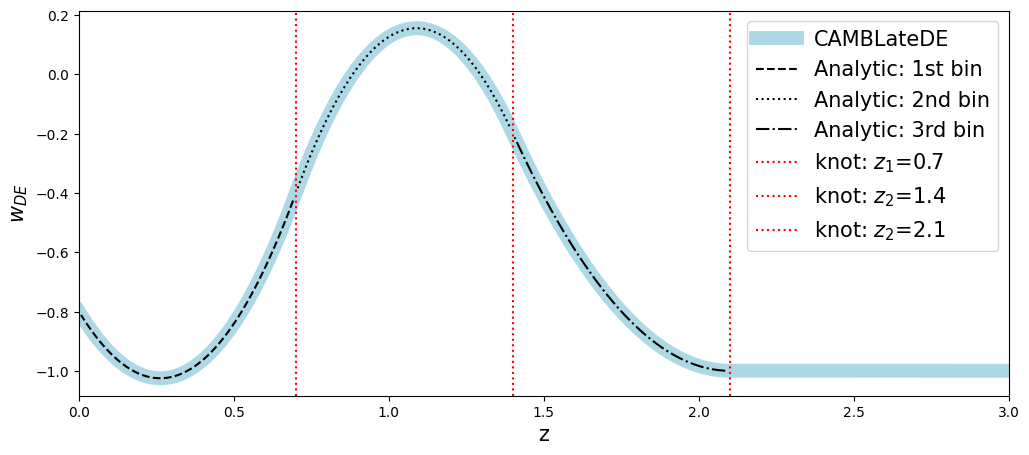

In [25]:
# # Model with 2 bins
z0 = 0
z1 = latede_results.Params.DarkEnergy.z1
z2 = latede_results.Params.DarkEnergy.z2
z3 = latede_results.Params.DarkEnergy.z3
#
w0 = latede_results.Params.DarkEnergy.w0
w1 = latede_results.Params.DarkEnergy.w1
w2 = latede_results.Params.DarkEnergy.w2
w3 = latede_results.Params.DarkEnergy.w3

Delta_z1 = z1-z0
Delta_z2 = z2-z1
Delta_z3 = z3-z2
Delta_w1 = w1-w0
Delta_w2 = w2-w1
Delta_w3 = w3-w2

# Boundary conditions -see my notes-
wa0  = 2.*(Delta_w1/Delta_z1 - Delta_w2/Delta_z2 + Delta_w3/Delta_z3)
waa0 = -Delta_w1/Delta_z1**2 + (2./Delta_z1)*(Delta_w2/Delta_z2 - Delta_w3/Delta_z3)
wa1  = 2.*(Delta_w2/Delta_z2 - Delta_w3/Delta_z3)
waa1 = -Delta_w2/Delta_z2**2 + 2*Delta_w3/(Delta_z2*Delta_z3)
wa2  = 2.*Delta_w3/Delta_z3
waa2 = -Delta_w3/Delta_z3**2
wa3  = 0
waa3 = 0

w_1st_bin,w_2nd_bin,w_3rd_bin=[],[],[]
redshift1,redshift2,redshift3=[],[],[]

for i in np.arange(len(redshift)):
    if (z0<redshift[i]<z1):
        redshift1.append(redshift[i])
        w_1st_bin.append(w0 + wa0*(redshift[i]-z0) + waa0*(redshift[i]-z0)**2)
    elif (z1<redshift[i]<z2):
        redshift2.append(redshift[i])    
        w_2nd_bin.append(w1 + wa1*(redshift[i]-z1) + waa1*(redshift[i]-z1)**2)
    elif (z2<redshift[i]<z3):
        redshift3.append(redshift[i])    
        w_3rd_bin.append(w2 + wa2*(redshift[i]-z2) + waa2*(redshift[i]-z2)**2)    

plt.rcParams['figure.figsize'] = [12, 5] 

plt.plot(redshift,quadratic_wde_3bins,color='lightblue',lw=10,label='CAMBLateDE')
plt.plot(redshift1,w_1st_bin,ls='--',color='black',label=r'Analytic: 1st bin')
plt.plot(redshift2,w_2nd_bin,ls=':',color='black',label=r'Analytic: 2nd bin')
plt.plot(redshift3,w_3rd_bin,ls='-.',color='black',label=r'Analytic: 3rd bin')

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_2$={}'.format(z3))

plt.xlabel('z',fontsize=15)
plt.ylabel(r'$w_{DE}$',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.xlim(0,3);
# plt.savefig("quadratic_binned_w.pdf");

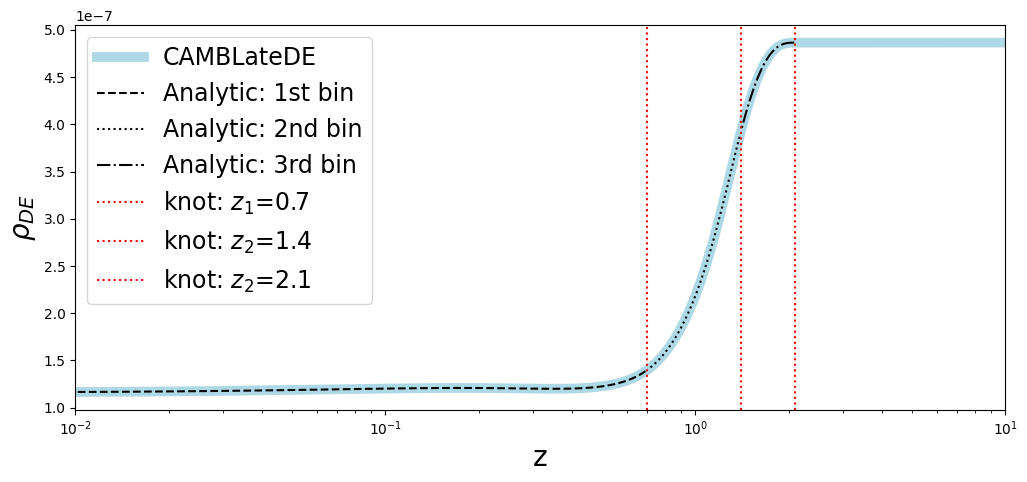

In [26]:
# DE energy density
z = redshift

rho_de_1st_bin, rho_de_2nd_bin, rho_de_3rd_bin = [], [], []
redshift1, redshift2, redshift3 = [], [], []

A00 = 3*(1 + w0 - wa0*z0 + waa0*z0**2)
A10 = 3*(wa0 - 2*waa0*z0)
A20 = 3*waa0

A01 = 3*(1 + w1 - wa1*z1 + waa1*z1**2)
A11 = 3*(wa1 - 2*waa1*z1)
A21 = 3*waa1

A02 = 3*(1 + w2 - wa2*z2 + waa2*z2**2)
A12 = 3*(wa2 - 2*waa2*z2)
A22 = 3*waa2

grho_de_today = 1.1598304491343165E-007 # from CAMB with write(*,*)

for i in np.arange(len(z)):
    if (z0 < z[i] < z1):
        redshift1.append(z[i])
        grho_de1 = grho_de_today * \
                   (((1+z[i])/(1+z0))**(A00-A10+A20))*np.exp((A10-A20)*(z[i]-z0)+A20*(z[i]**2-z0**2)/2)
        rho_de_1st_bin.append(grho_de1)
    elif (z1 < z[i] < z2):
        redshift2.append(z[i]) 
        grho_de2 = grho_de_today * \
                   (((1+z1)  /(1+z0))**(A00-A10+A20))*np.exp((A10-A20)*(z1  -z0)+A20*(z1**2   -z0**2)/2) * \
                   (((1+z[i])/(1+z1))**(A01-A11+A21))*np.exp((A11-A21)*(z[i]-z1)+A21*(z[i]**2 -z1**2)/2)
        rho_de_2nd_bin.append(grho_de2)
    elif (z2 < z[i] < z3):
        redshift3.append(redshift[i])  
        grho_de3 = grho_de_today * \
                   (((1+z1)  /(1+z0))**(A00-A10+A20))*np.exp((A10-A20)*(z1  -z0)+A20*(z1**2  -z0**2)/2) * \
                   (((1+z2)  /(1+z1))**(A01-A11+A21))*np.exp((A11-A21)*(z2  -z1)+A21*(z2**2  -z1**2)/2) * \
                   (((1+z[i])/(1+z2))**(A02-A12+A22))*np.exp((A12-A22)*(z[i]-z2)+A22*(z[i]**2-z2**2)/2)
        rho_de_3rd_bin.append(grho_de3)

plt.rcParams['figure.figsize'] = [12, 5]

plt.semilogx(redshift,quadratic_rhode_3bins*(redshift+1)**4,'lightblue',label='CAMBLateDE',lw=7)
plt.semilogx(redshift1,rho_de_1st_bin,ls='--',color='black',label=r'Analytic: 1st bin')
plt.semilogx(redshift2,rho_de_2nd_bin,ls=':',color='black',label=r'Analytic: 2nd bin')
plt.semilogx(redshift3,rho_de_3rd_bin,ls='-.',color='black',label=r'Analytic: 3rd bin')

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_2$={}'.format(z3))

plt.legend(loc='best',fontsize=17)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$\rho_{DE}$',fontsize=20)
plt.xlim(0.01,10);
# plt.savefig("quadratic_binned_rhode.pdf");

### Section 6 - Cubic $w(z)$: 2 bins

In [27]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


In [28]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 14,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [29]:
scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

latede_results = camb.get_results(latede_cosmology)
rho_test, cubic_wde_2bins = latede_results.get_dark_energy_rho_w(scale_factor)
cubic_rhode_2bins = latede_results.get_background_densities(scale_factor)['de']

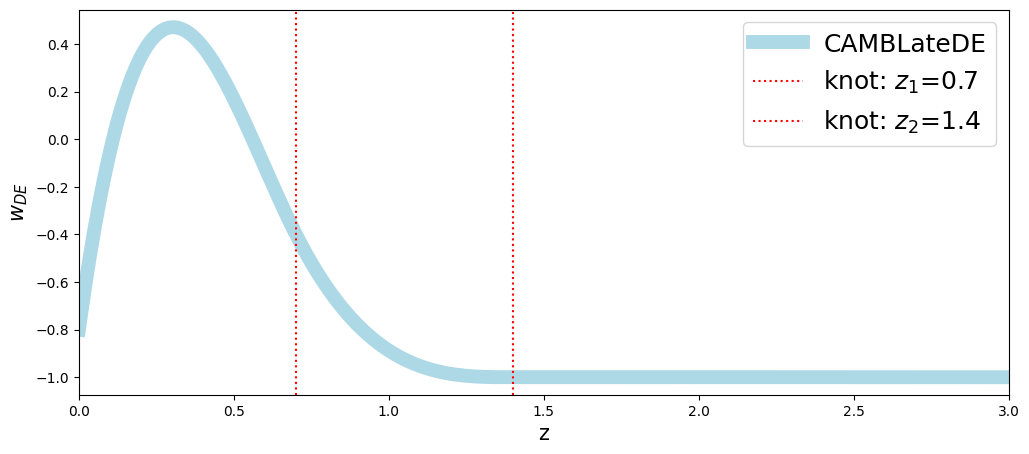

In [30]:
# Model with 2 bins
# z0 = 0
z1 = latede_results.Params.DarkEnergy.z1
z2 = latede_results.Params.DarkEnergy.z2
z3 = latede_results.Params.DarkEnergy.z3

plt.rcParams['figure.figsize'] = [12, 5] 

plt.plot(redshift,cubic_wde_2bins,color='lightblue',lw=10,label='CAMBLateDE')
# plt.plot(redshift1,w_1st_bin,ls='--',color='black',label=r'Analytic $w(z)$: 1st bin')
# plt.plot(redshift2,w_2nd_bin,ls=':',color='black',label=r'Analytic $w(z)$: 2nd bin')
# plt.plot(redshift3,w_3rd_bin,ls='-.',color='black',label=r'Analytic: $w(z)$: 3rd bin')

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))

plt.xlabel('z',fontsize=15)
plt.ylabel(r'$w_{DE}$',fontsize=15)
plt.legend(loc='best',fontsize=18)
plt.xlim(0,3);
# plt.savefig("quadratic_binned_w.pdf");

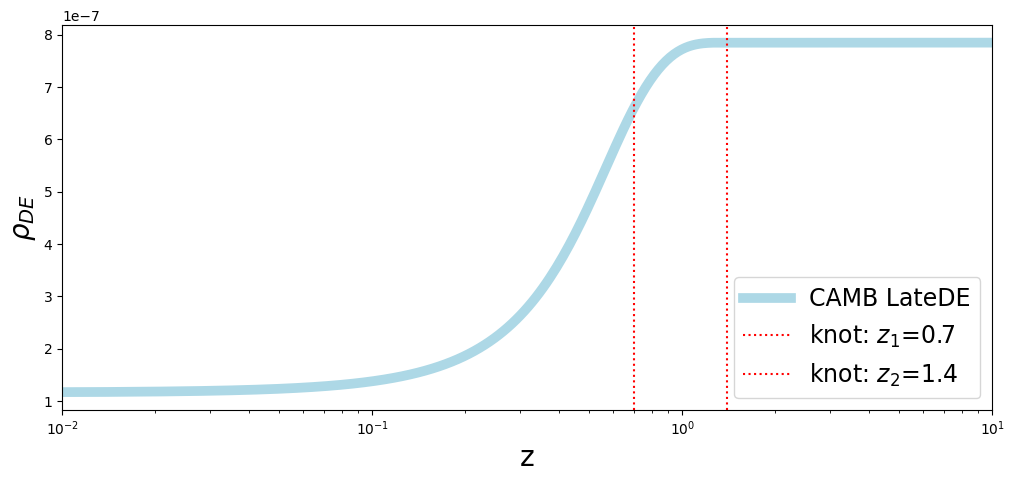

In [31]:
# DE energy density
z = redshift

grho_de_today = 1.1598304491343165E-007 # from CAMB with write(*,*)

plt.rcParams['figure.figsize'] = [12, 5]

plt.semilogx(redshift,cubic_rhode_2bins*(redshift+1)**4,'lightblue',label='CAMB LateDE',lw=7)

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))

plt.legend(loc='lower right',fontsize=17)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$\rho_{DE}$',fontsize=20)
plt.xlim(0.01,10);
# plt.savefig("cubic_binned_rhode.pdf");

### Section 7 - Cubic $w(z)$: 3 bins

In [32]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


In [33]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 15,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [34]:
scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

latede_results = camb.get_results(latede_cosmology)
rho_test, cubic_wde_2bins = latede_results.get_dark_energy_rho_w(scale_factor)
cubic_rhode_2bins = latede_results.get_background_densities(scale_factor)['de']

### Section 8 - Linear vs Quadratic vs Cubic $w(z)$: 2 bins

In [35]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

# Linear 2 bins
cosmology_L_2bins = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 7,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)
# Quadratic 2 bins
cosmology_Q_2bins = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 11,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

# Cubic 2 bins
cosmology_C_2bins = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 14,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

# Linear w(z)
results_L_2bins = camb.get_results(cosmology_L_2bins)
rho_L_2bins, wde_L_2bins = results_L_2bins.get_dark_energy_rho_w(scale_factor)
rhode_L_2bins = results_L_2bins.get_background_densities(scale_factor)['de']
# Quadratic w(z)
results_Q_2bins = camb.get_results(cosmology_Q_2bins)
rho_Q_2bins, wde_Q_2bins = results_Q_2bins.get_dark_energy_rho_w(scale_factor)
rhode_Q_2bins = results_Q_2bins.get_background_densities(scale_factor)['de']
# Cubic w(z)
results_C_2bins = camb.get_results(cosmology_C_2bins)
rho_C_2bins, wde_C_2bins = results_C_2bins.get_dark_energy_rho_w(scale_factor)
rhode_C_2bins = results_C_2bins.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


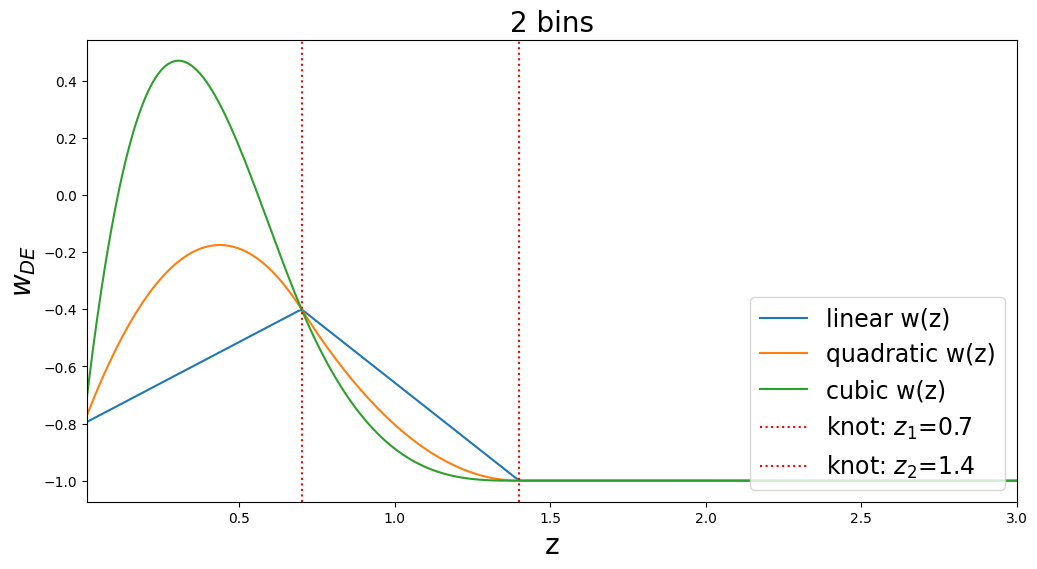

In [36]:
z0 = 0
z1 = results_L_2bins.Params.DarkEnergy.z1
z2 = results_L_2bins.Params.DarkEnergy.z2
z3 = results_L_2bins.Params.DarkEnergy.z3
#
w0 = results_L_2bins.Params.DarkEnergy.w0
w1 = results_L_2bins.Params.DarkEnergy.w1
w2 = results_L_2bins.Params.DarkEnergy.w2
w3 = results_L_2bins.Params.DarkEnergy.w3

Delta_z1 = z1-z0
Delta_z2 = z2-z1
Delta_z3 = z3-z2
Delta_w1 = w1-w0
Delta_w2 = w2-w1
Delta_w3 = w3-w2

plt.rcParams['figure.figsize'] = [12, 6] 

plt.plot(redshift,wde_L_2bins,label='linear w(z)')
plt.plot(redshift,wde_Q_2bins,label='quadratic w(z)')
plt.plot(redshift,wde_C_2bins,label='cubic w(z)')
plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.legend(loc='lower right',fontsize=17)
plt.title('2 bins',fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.01,3)
# plt.savefig('wde_2bins_linear_quadratic_cubic.pdf');
plt.show()

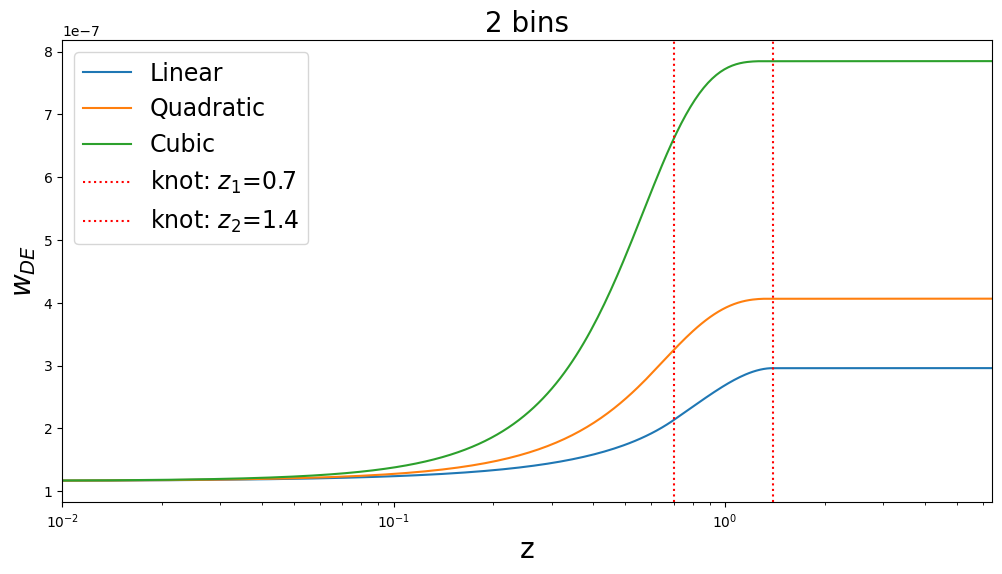

In [37]:
plt.semilogx(redshift,rhode_L_2bins*(1+redshift)**4, label='Linear')
plt.semilogx(redshift,rhode_Q_2bins*(1+redshift)**4, label='Quadratic')
plt.semilogx(redshift,rhode_C_2bins*(1+redshift)**4, label='Cubic')
plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.legend(loc='best',fontsize=17)
plt.title('2 bins',fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.01,z2+5);

### Section 9 - Linear vs Quadratic vs Cubic $w(z)$: 3 bins

In [38]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

# Linear 3 bins
w0_val, w1_val, w2_val = 0, -0.8, -0.2
cosmology_L_3bins = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 8,
                            w0 = w0_val, w1 = w1_val, w2 = w2_val, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)
# Quadratic 3 bins
cosmology_Q_3bins = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 12,
                            w0 = w0_val, w1 = w1_val, w2 = w2_val, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

# Cubic 3 bins
cosmology_C_3bins = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 15,
                            w0 = w0_val, w1 = w1_val, w2 = w2_val, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

# Linear w(z)
results_L_3bins = camb.get_results(cosmology_L_3bins)
rho_L_3bins, wde_L_3bins = results_L_3bins.get_dark_energy_rho_w(scale_factor)
rhode_L_3bins = results_L_3bins.get_background_densities(scale_factor)['de']
# Quadratic w(z)
results_Q_3bins = camb.get_results(cosmology_Q_3bins)
rho_Q_3bins, wde_Q_3bins = results_Q_3bins.get_dark_energy_rho_w(scale_factor)
rhode_Q_3bins = results_Q_3bins.get_background_densities(scale_factor)['de']
# Cubic w(z)
results_C_3bins = camb.get_results(cosmology_C_3bins)
rho_C_3bins, wde_C_3bins = results_C_3bins.get_dark_energy_rho_w(scale_factor)
rhode_C_3bins = results_C_3bins.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


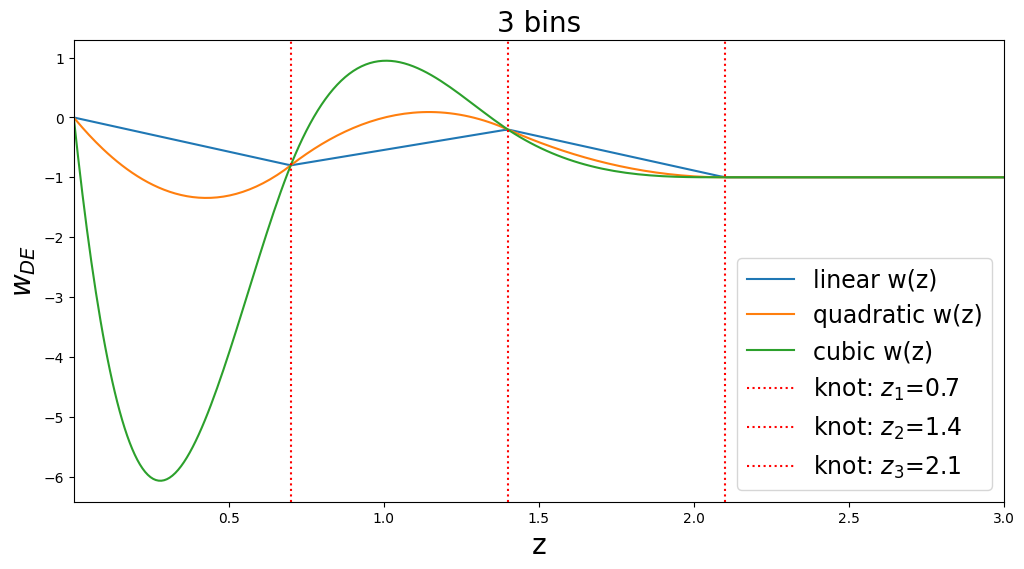

In [39]:
z0 = 0
z1 = results_L_3bins.Params.DarkEnergy.z1
z2 = results_L_3bins.Params.DarkEnergy.z2
z3 = results_L_3bins.Params.DarkEnergy.z3
#
w0 = results_L_3bins.Params.DarkEnergy.w0
w1 = results_L_3bins.Params.DarkEnergy.w1
w2 = results_L_3bins.Params.DarkEnergy.w2
w3 = results_L_3bins.Params.DarkEnergy.w3

Delta_z1 = z1-z0
Delta_z2 = z2-z1
Delta_z3 = z3-z2
Delta_w1 = w1-w0
Delta_w2 = w2-w1
Delta_w3 = w3-w2

plt.rcParams['figure.figsize'] = [12, 6] 

plt.plot(redshift,wde_L_3bins,label='linear w(z)')
plt.plot(redshift,wde_Q_3bins,label='quadratic w(z)')
plt.plot(redshift,wde_C_3bins,label='cubic w(z)')
plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_3$={}'.format(z3))
plt.legend(loc='lower right',fontsize=17)
plt.title('3 bins',fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.0001,3)
# plt.savefig('wde_3bins_linear_quadratic_cubic.pdf');
plt.show()

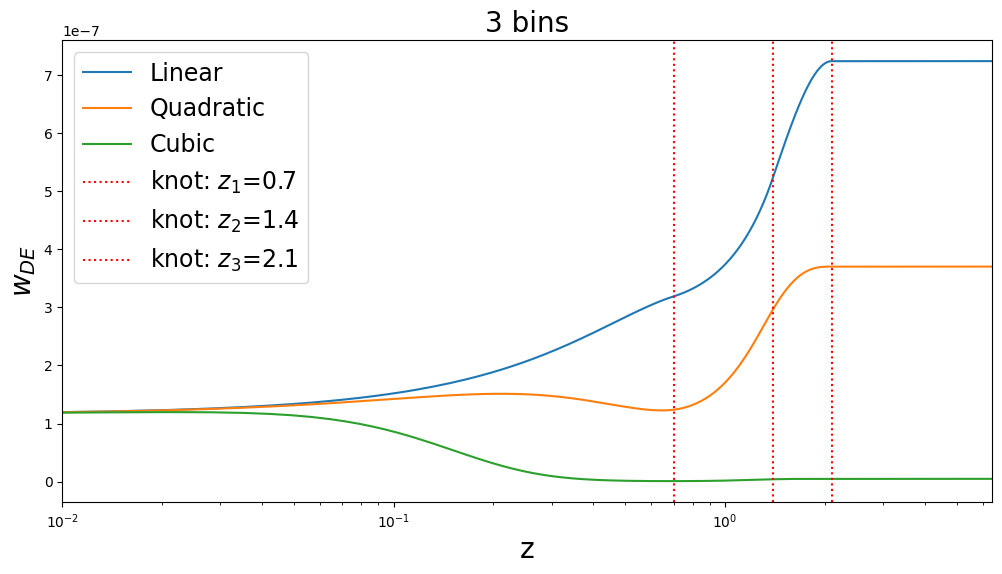

In [40]:
plt.semilogx(redshift,rhode_L_3bins*(1+redshift)**4, label='Linear')
plt.semilogx(redshift,rhode_Q_3bins*(1+redshift)**4, label='Quadratic')
plt.semilogx(redshift,rhode_C_3bins*(1+redshift)**4, label='Cubic')
plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_3$={}'.format(z3))
plt.legend(loc='best',fontsize=17)
plt.title('3 bins',fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.01,z2+5);

### Section 10 - Constant $w(z)$: Arbitrary # of bins

In [41]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

# Constant w(z): estatic number of bins 

DEmodel_est = 5
ws = [-1+0.3*np.sin(i) for i in range(DEmodel_est)]
zs = [0.5*(i+1) for i in range(DEmodel_est)]

cosmology_C_est = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = DEmodel_est, # Constant 5 bins
                            max_num_of_bins=2,
                            z_knot = [0.7, 1.4],
                            w_knot = [-0.8, -0.4],
                            w0 = ws[0], w1 = ws[1], w2 = ws[2], w3 = ws[3], w4 = ws[4],
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=zs[0], z2=zs[1], z3=zs[2], z4=zs[3], z5=zs[4],
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

# Constant w(z): dynamical number of bins 
Nbins = 20
cosmology_C_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 18, # arbitrary number of bins with
                            max_num_of_bins=Nbins,
                            z_knot = [0.5*(i+1) for i in range(20)], 
                            w_knot = [-1+0.3*np.sin(i) for i in range(20) ], 
                            w0 = -0.8, w1 = -0.4, w2 = -0.2, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-2, 0, 2000)
redshift = 1/scale_factor - 1

# # Constant dynamic # of bins w(z)
results_C_dyn = camb.get_results(cosmology_C_dyn)
rho_C_dyn, wde_C_dyn = results_C_dyn.get_dark_energy_rho_w(scale_factor)
rhode_C_dyn = results_C_dyn.get_background_densities(scale_factor)['de']

# # Constant estatic # of bins w(z)
results_C_est = camb.get_results(cosmology_C_est)
rho_C_est, wde_C_est = results_C_est.get_dark_energy_rho_w(scale_factor)
rhode_C_est = results_C_est.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


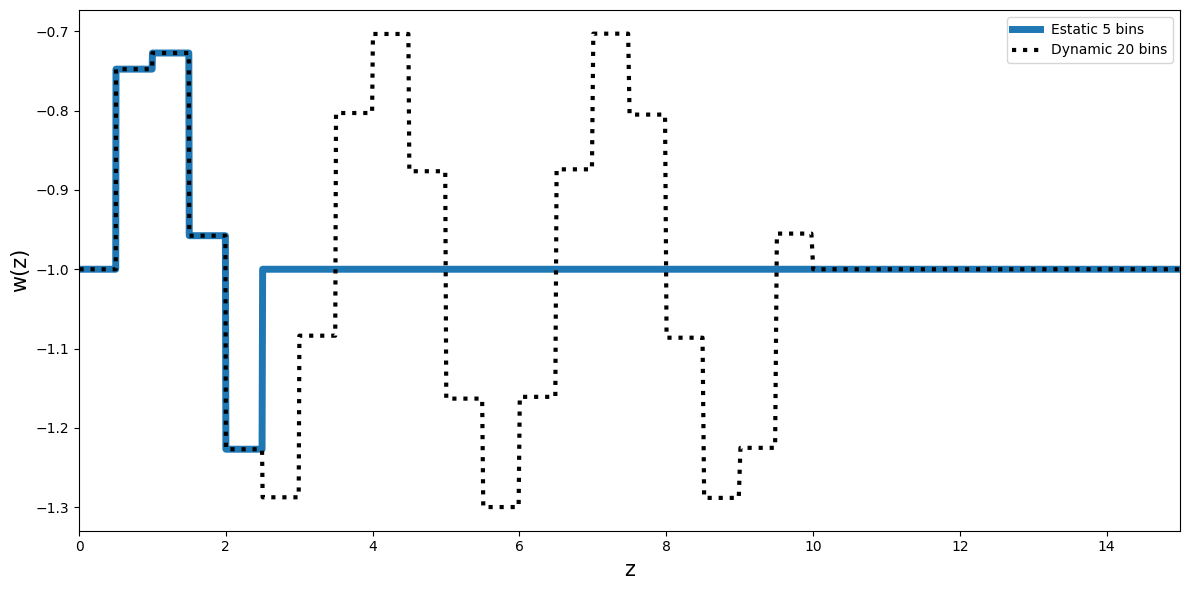

In [42]:
plt.plot(redshift, wde_C_est, lw=5, label=f'Estatic {DEmodel_est} bins');
plt.plot(redshift, wde_C_dyn, lw=3, c='k', ls=':', label=f'Dynamic {Nbins} bins')
plt.legend(loc='best')
plt.xlim(0,15)
plt.ylabel('w(z)',fontsize=15)
plt.xlabel('z',fontsize=15)
plt.tight_layout()
# plt.savefig('/home/grads/data/Diogo/CAMBLateDE/docs/arbitrarynofbins_w.pdf');

(0.0, 15.0)

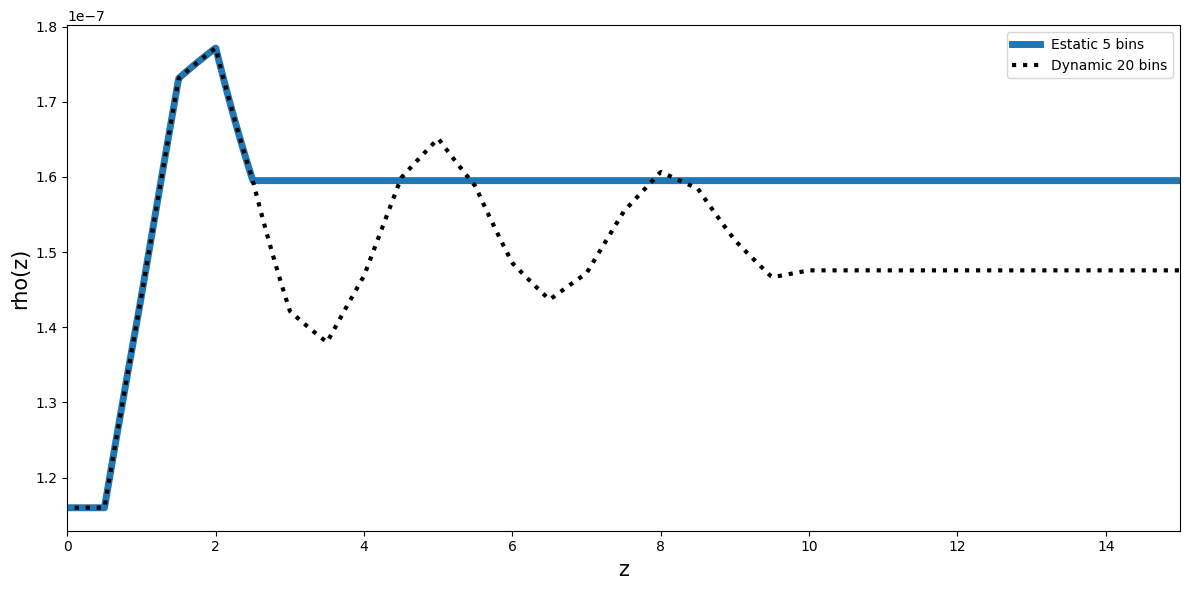

In [43]:
plt.plot(redshift, rho_C_est, lw=5, label=f'Estatic {DEmodel_est} bins')
plt.plot(redshift, rho_C_dyn, lw=3, c='k', ls=':', label=f'Dynamic {Nbins} bins')
plt.legend(loc='best')
plt.ylabel('rho(z)',fontsize=15)
plt.xlabel('z',fontsize=15)
plt.tight_layout()
# plt.savefig('/home/grads/data/Diogo/CAMBLateDE/docs/arbitrarynofbins_rho.pdf');
plt.xlim(0,15)

In [4]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

# Linear w(z): estatic number of bins 
cosmology_L_est = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 7,
                            max_num_of_bins=3,
                            z_knot = [0, 0.7, 1.4, 2.1],
                            w_knot = [-0.8, -0.4, -0.9, -1],
                            w0 = -0.8, w1 = -0.4, w2 = -0.9, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

# Linear w(z): dynamical number of bins 
cosmology_L_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 12,
                            max_num_of_bins=3,
                            z_knot = [0, 0.7, 1.4, 2.1],
                            w_knot = [-0.8, -0.4, -0.9, -1],
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

# Linear w(z)
results_L_est = camb.get_results(cosmology_L_est)
rho_L_est, wde_L_est = results_L_est.get_dark_energy_rho_w(scale_factor)
rhode_L_est = results_L_est.get_background_densities(scale_factor)['de']

# Linear w(z)
results_L_dyn = camb.get_results(cosmology_L_dyn)
rho_L_dyn, wde_L_dyn = results_L_dyn.get_dark_energy_rho_w(scale_factor)
rhode_L_dyn = results_L_dyn.get_background_densities(scale_factor)['de']

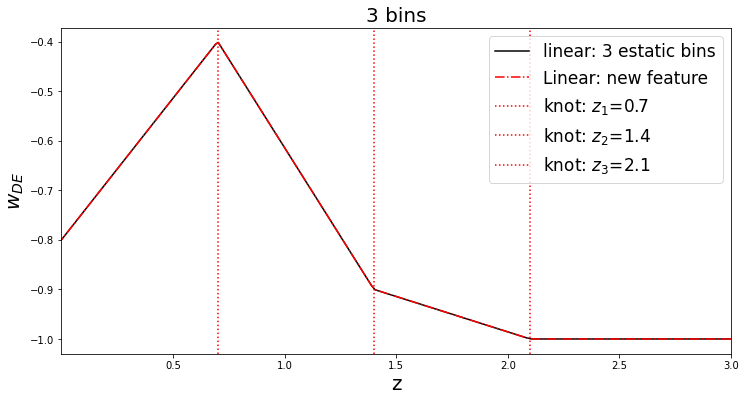

In [4]:
z0 = 0
z1 = results_L_est.Params.DarkEnergy.z1
z2 = results_L_est.Params.DarkEnergy.z2
z3 = results_L_est.Params.DarkEnergy.z3

plt.rcParams['figure.figsize'] = [12, 6] 

plt.plot(redshift,wde_L_est,label='linear: 3 estatic bins',c='k')
plt.plot(redshift,wde_L_dyn,label='Linear: new feature ',c='r',ls='-.')
plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_3$={}'.format(z3))

plt.legend(loc='best',fontsize=17)
plt.title('3 bins',fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.0001,3)
# plt.savefig('wde_3bins_linear_quadratic_cubic.pdf');
plt.show()

In [14]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys
import random

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))


max_num_of_bins = 3

z_knot_lst = [random.uniform(0, 2.1) for i in range(max_num_of_bins)]
w_knot_lst = [random.uniform(0, -0.9) for i in range(max_num_of_bins)]
z_knot_lst.append(0)
z_knot_lst = sorted(z_knot_lst)
w_knot_lst.append(-1)

z_knot_cut = z_knot_lst[0:4]
w_knot_cut = w_knot_lst[0:4]

# # Linear w(z): estatic number of bins 
cosmology_L_est = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 7,
                            max_num_of_bins=3,
                            z_knot = z_knot_lst[0:4],
                            w_knot = w_knot_lst[0:4],
                            w0 = w_knot_cut[0], w1 = w_knot_cut[1], w2 = w_knot_cut[2], w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=z_knot_cut[1], z2=z_knot_cut[2], z3=z_knot_cut[3], z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

# Linear w(z): dynamical number of bins 
cosmology_L_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 12,
                            max_num_of_bins=max_num_of_bins,
                            z_knot = z_knot_lst,
                            w_knot = w_knot_lst,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

# Linear w(z)
results_L_est = camb.get_results(cosmology_L_est)
rho_L_est, wde_L_est = results_L_est.get_dark_energy_rho_w(scale_factor)
rhode_L_est = results_L_est.get_background_densities(scale_factor)['de']

# Linear w(z)
results_L_dyn = camb.get_results(cosmology_L_dyn)
rho_L_dyn, wde_L_dyn = results_L_dyn.get_dark_energy_rho_w(scale_factor)
rhode_L_dyn = results_L_dyn.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


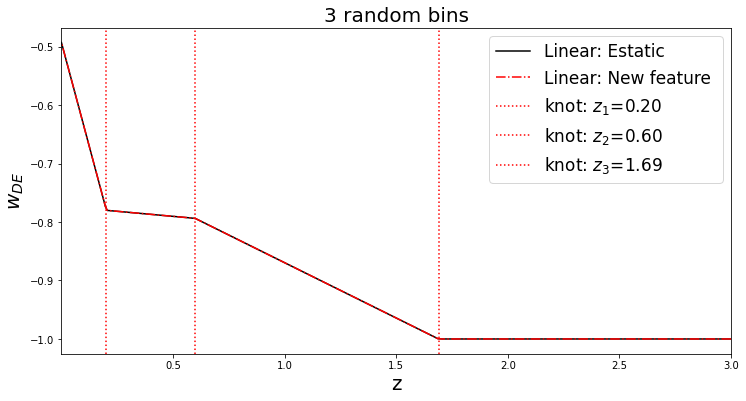

In [27]:
plt.rcParams['figure.figsize'] = [12, 6] 

z1 = results_L_est.Params.DarkEnergy.z1
z2 = results_L_est.Params.DarkEnergy.z2
z3 = results_L_est.Params.DarkEnergy.z3

plt.plot(redshift,wde_L_est,label='Linear: Estatic',c='k',ls='-')
plt.plot(redshift,wde_L_dyn,label='Linear: New feature ',c='r',ls='-.')
plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={:.2f}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={:.2f}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_3$={:.2f}'.format(z3))

plt.legend(loc='best',fontsize=17)
plt.title('3 random bins',fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.0001,3)
# plt.savefig('wde_3bins_linear_quadratic_cubic.pdf');
plt.show()

In [5]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys
import random

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))


max_num_of_bins = 500

z_knot_lst = [random.uniform(0, 10) for i in range(max_num_of_bins)]
w_knot_lst = [random.uniform(0, -0.9) for i in range(max_num_of_bins)]
z_knot_lst.append(0)
z_knot_lst = sorted(z_knot_lst)
w_knot_lst.append(-1)

# Linear w(z): dynamical number of bins 
cosmology_L_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 12,
                            max_num_of_bins=max_num_of_bins,
                            z_knot = z_knot_lst,
                            w_knot = w_knot_lst,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

# Linear w(z)
results_L_dyn = camb.get_results(cosmology_L_dyn)
rho_L_dyn, wde_L_dyn = results_L_dyn.get_dark_energy_rho_w(scale_factor)
rhode_L_dyn = results_L_dyn.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


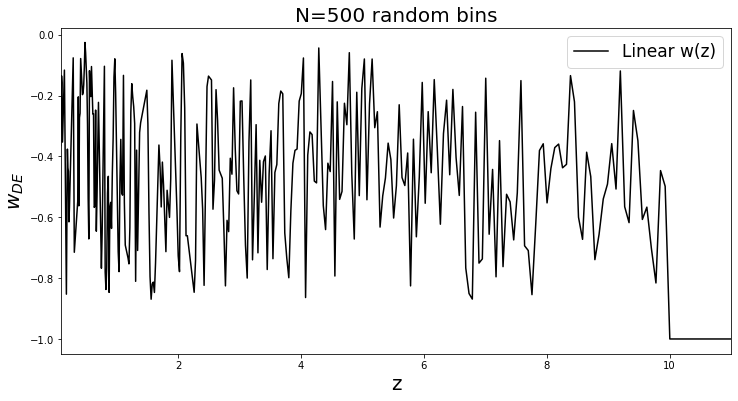

In [7]:
plt.rcParams['figure.figsize'] = [12, 6] 

plt.plot(redshift,wde_L_dyn,label='Linear w(z)',c='k',ls='-')

plt.legend(loc='best',fontsize=17)
plt.title('N={} random bins'.format(max_num_of_bins),fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.1,11)
# plt.savefig('wde_3bins_linear_quadratic_cubic.pdf');
plt.show()

In [1]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

# Quadratic w(z): estatic number of bins 
cosmology_Q_est = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 9,
                            max_num_of_bins=3,
                            z_knot = [0, 0.7, 1.4],
                            w_knot = [-0.8, -0.4, -1],
                            w0 = -0.8, w1 = -0.4, w2 = -0.9, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

# Quadratic w(z): dynamical number of bins 
cosmology_Q_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 13,
                            max_num_of_bins=3,
                            z_knot = [0, 0.7, 1.4, 2.1],
                            w_knot = [-0.8, -0.4, -0.9, -1],
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

# Quadratic w(z)
results_Q_est = camb.get_results(cosmology_Q_est)
rho_Q_est, wde_Q_est = results_Q_est.get_dark_energy_rho_w(scale_factor)
rhode_Q_est = results_Q_est.get_background_densities(scale_factor)['de']

# Quadratic w(z)
results_Q_dyn = camb.get_results(cosmology_Q_dyn)
rho_Q_dyn, wde_Q_dyn = results_Q_dyn.get_dark_energy_rho_w(scale_factor)
rhode_Q_dyn = results_Q_dyn.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


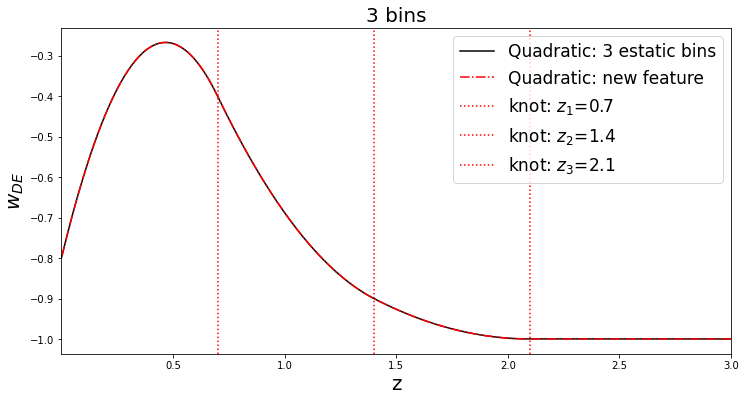

In [2]:
z1 = results_Q_est.Params.DarkEnergy.z1
z2 = results_Q_est.Params.DarkEnergy.z2
z3 = results_Q_est.Params.DarkEnergy.z3

plt.rcParams['figure.figsize'] = [12, 6] 

plt.plot(redshift,wde_Q_est,label='Quadratic: 3 estatic bins',c='k')
plt.plot(redshift,wde_Q_dyn,label='Quadratic: new feature ',c='r',ls='-.')
plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_3$={}'.format(z3))

plt.legend(loc='best',fontsize=17)
plt.title('3 bins',fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.0001,3)
# plt.savefig('wde_3bins_linear_quadratic_cubic.pdf');
plt.show()

In [1]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys
import random

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))


max_num_of_bins = 3

z_knot_lst = [random.uniform(0, 2.1) for i in range(max_num_of_bins)]
w_knot_lst = [random.uniform(0, -0.9) for i in range(max_num_of_bins)]
z_knot_lst.append(0)
z_knot_lst = sorted(z_knot_lst)
w_knot_lst.append(-1)

z_knot_cut = z_knot_lst[0:4]
w_knot_cut = w_knot_lst[0:4]

# Quadratic w(z): estatic number of bins 
cosmology_Q_est = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 9,
                            max_num_of_bins=3,
                            z_knot = z_knot_lst[0:4],
                            w_knot = w_knot_lst[0:4],
                            w0 = w_knot_cut[0], w1 = w_knot_cut[1], w2 = w_knot_cut[2], w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=z_knot_cut[1], z2=z_knot_cut[2], z3=z_knot_cut[3], z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

# Quadratic w(z): dynamical number of bins 
cosmology_Q_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 13,
                            max_num_of_bins=max_num_of_bins,
                            z_knot = z_knot_lst,
                            w_knot = w_knot_lst,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

# Quadratic w(z) - 3 estatic bins 
results_Q_est = camb.get_results(cosmology_Q_est)
rho_Q_est, wde_Q_est = results_Q_est.get_dark_energy_rho_w(scale_factor)
rhode_Q_est = results_Q_est.get_background_densities(scale_factor)['de']

# Quadratic w(z) - new feature
results_Q_dyn = camb.get_results(cosmology_Q_dyn)
rho_Q_dyn, wde_Q_dyn = results_Q_dyn.get_dark_energy_rho_w(scale_factor)
rhode_Q_dyn = results_Q_dyn.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


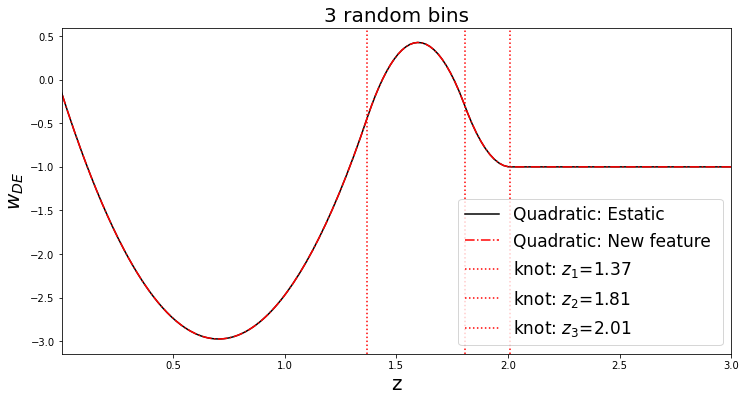

In [2]:
plt.rcParams['figure.figsize'] = [12, 6] 

z1 = results_Q_est.Params.DarkEnergy.z1
z2 = results_Q_est.Params.DarkEnergy.z2
z3 = results_Q_est.Params.DarkEnergy.z3

plt.plot(redshift,wde_Q_est,label='Quadratic: Estatic',c='k',ls='-')
plt.plot(redshift,wde_Q_dyn,label='Quadratic: New feature ',c='r',ls='-.')
plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={:.2f}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={:.2f}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_3$={:.2f}'.format(z3))

plt.legend(loc='best',fontsize=17)
plt.title('3 random bins',fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.0001,3)
# plt.savefig('wde_3bins_linear_quadratic_cubic.pdf');
plt.show()

In [3]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys
import random

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))


max_num_of_bins = 100

z_knot_lst = [random.uniform(0, 5) for i in range(max_num_of_bins)]
w_knot_lst = [random.uniform(0, -0.9) for i in range(max_num_of_bins)]
z_knot_lst.append(0)
z_knot_lst = sorted(z_knot_lst)
w_knot_lst.append(-1)

# Quadratic w(z): dynamical number of bins 
cosmology_Q_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 13,
                            max_num_of_bins=max_num_of_bins,
                            z_knot = z_knot_lst,
                            w_knot = w_knot_lst,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 5000)
redshift = 1/scale_factor - 1

# Quadratic w(z)
results_Q_dyn = camb.get_results(cosmology_Q_dyn)
rho_Q_dyn, wde_Q_dyn = results_Q_dyn.get_dark_energy_rho_w(scale_factor)
rhode_Q_dyn = results_Q_dyn.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


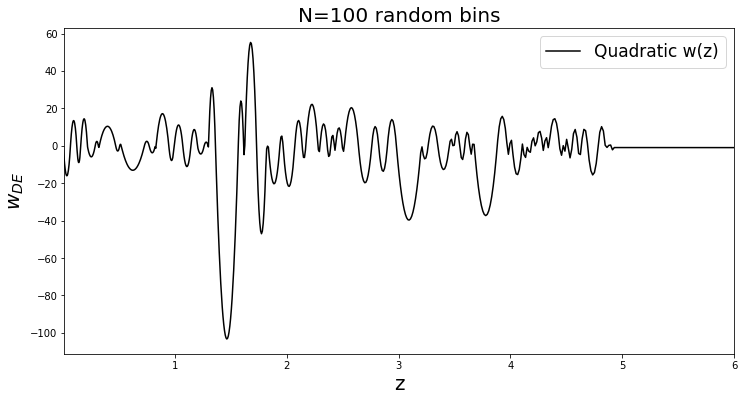

In [4]:
plt.rcParams['figure.figsize'] = [12, 6] 

plt.plot(redshift,wde_Q_dyn,label='Quadratic w(z)',c='k',ls='-')

plt.legend(loc='best',fontsize=17)
plt.title('N={} random bins'.format(max_num_of_bins),fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.01,6)
# plt.savefig('wde_3bins_linear_quadratic_cubic.pdf');
plt.show()

In [25]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys
import random

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

max_num_of_bins = 6

z_knot_lst = np.arange(0,3.5,.5) #[random.uniform(0, 3) for i in range(max_num_of_bins)]
w_knot_lst = [random.uniform(-.5, 0) for i in range(max_num_of_bins)]
# z_knot_lst.append(0)
# z_knot_lst = sorted(z_knot_lst)
w_knot_lst.append(-1)
w_knot_lst = sorted(w_knot_lst)[::-1]

# Quadratic w(z): dynamical number of bins 
cosmology_L_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 12,
                            max_num_of_bins=max_num_of_bins,
                            z_knot = z_knot_lst,
                            w_knot = w_knot_lst,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

# Quadratic w(z): dynamical number of bins 
cosmology_Q_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 13,
                            max_num_of_bins=max_num_of_bins,
                            z_knot = z_knot_lst,
                            w_knot = w_knot_lst,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 5000)
redshift = 1/scale_factor - 1

# Linear w(z)
results_L_dyn = camb.get_results(cosmology_L_dyn)
rho_L_dyn, wde_L_dyn = results_L_dyn.get_dark_energy_rho_w(scale_factor)
rhode_L_dyn = results_L_dyn.get_background_densities(scale_factor)['de']

# Quadratic w(z)
results_Q_dyn = camb.get_results(cosmology_Q_dyn)
rho_Q_dyn, wde_Q_dyn = results_Q_dyn.get_dark_energy_rho_w(scale_factor)
rhode_Q_dyn = results_Q_dyn.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


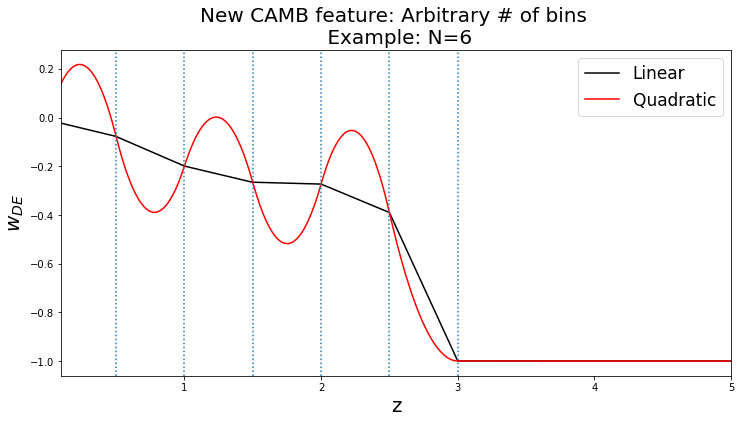

In [26]:
plt.rcParams['figure.figsize'] = [12, 6] 

plt.plot(redshift,wde_L_dyn,label='Linear',c='k',ls='-')
plt.plot(redshift,wde_Q_dyn,label='Quadratic',c='r',ls='-')

for i in np.arange(len(z_knot_lst)):
    plt.axvline(x = z_knot_lst[i],ls=':',c='C0')

plt.legend(loc='best',fontsize=17)
plt.title('New CAMB feature: Arbitrary # of bins \n Example: N={}'.format(max_num_of_bins),fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
# plt.xscale('log')
plt.xlim(0.1,5)
# plt.ylim(-1,1)
# plt.savefig('wde_Nbins_linear_quadratic.pdf');
plt.show()